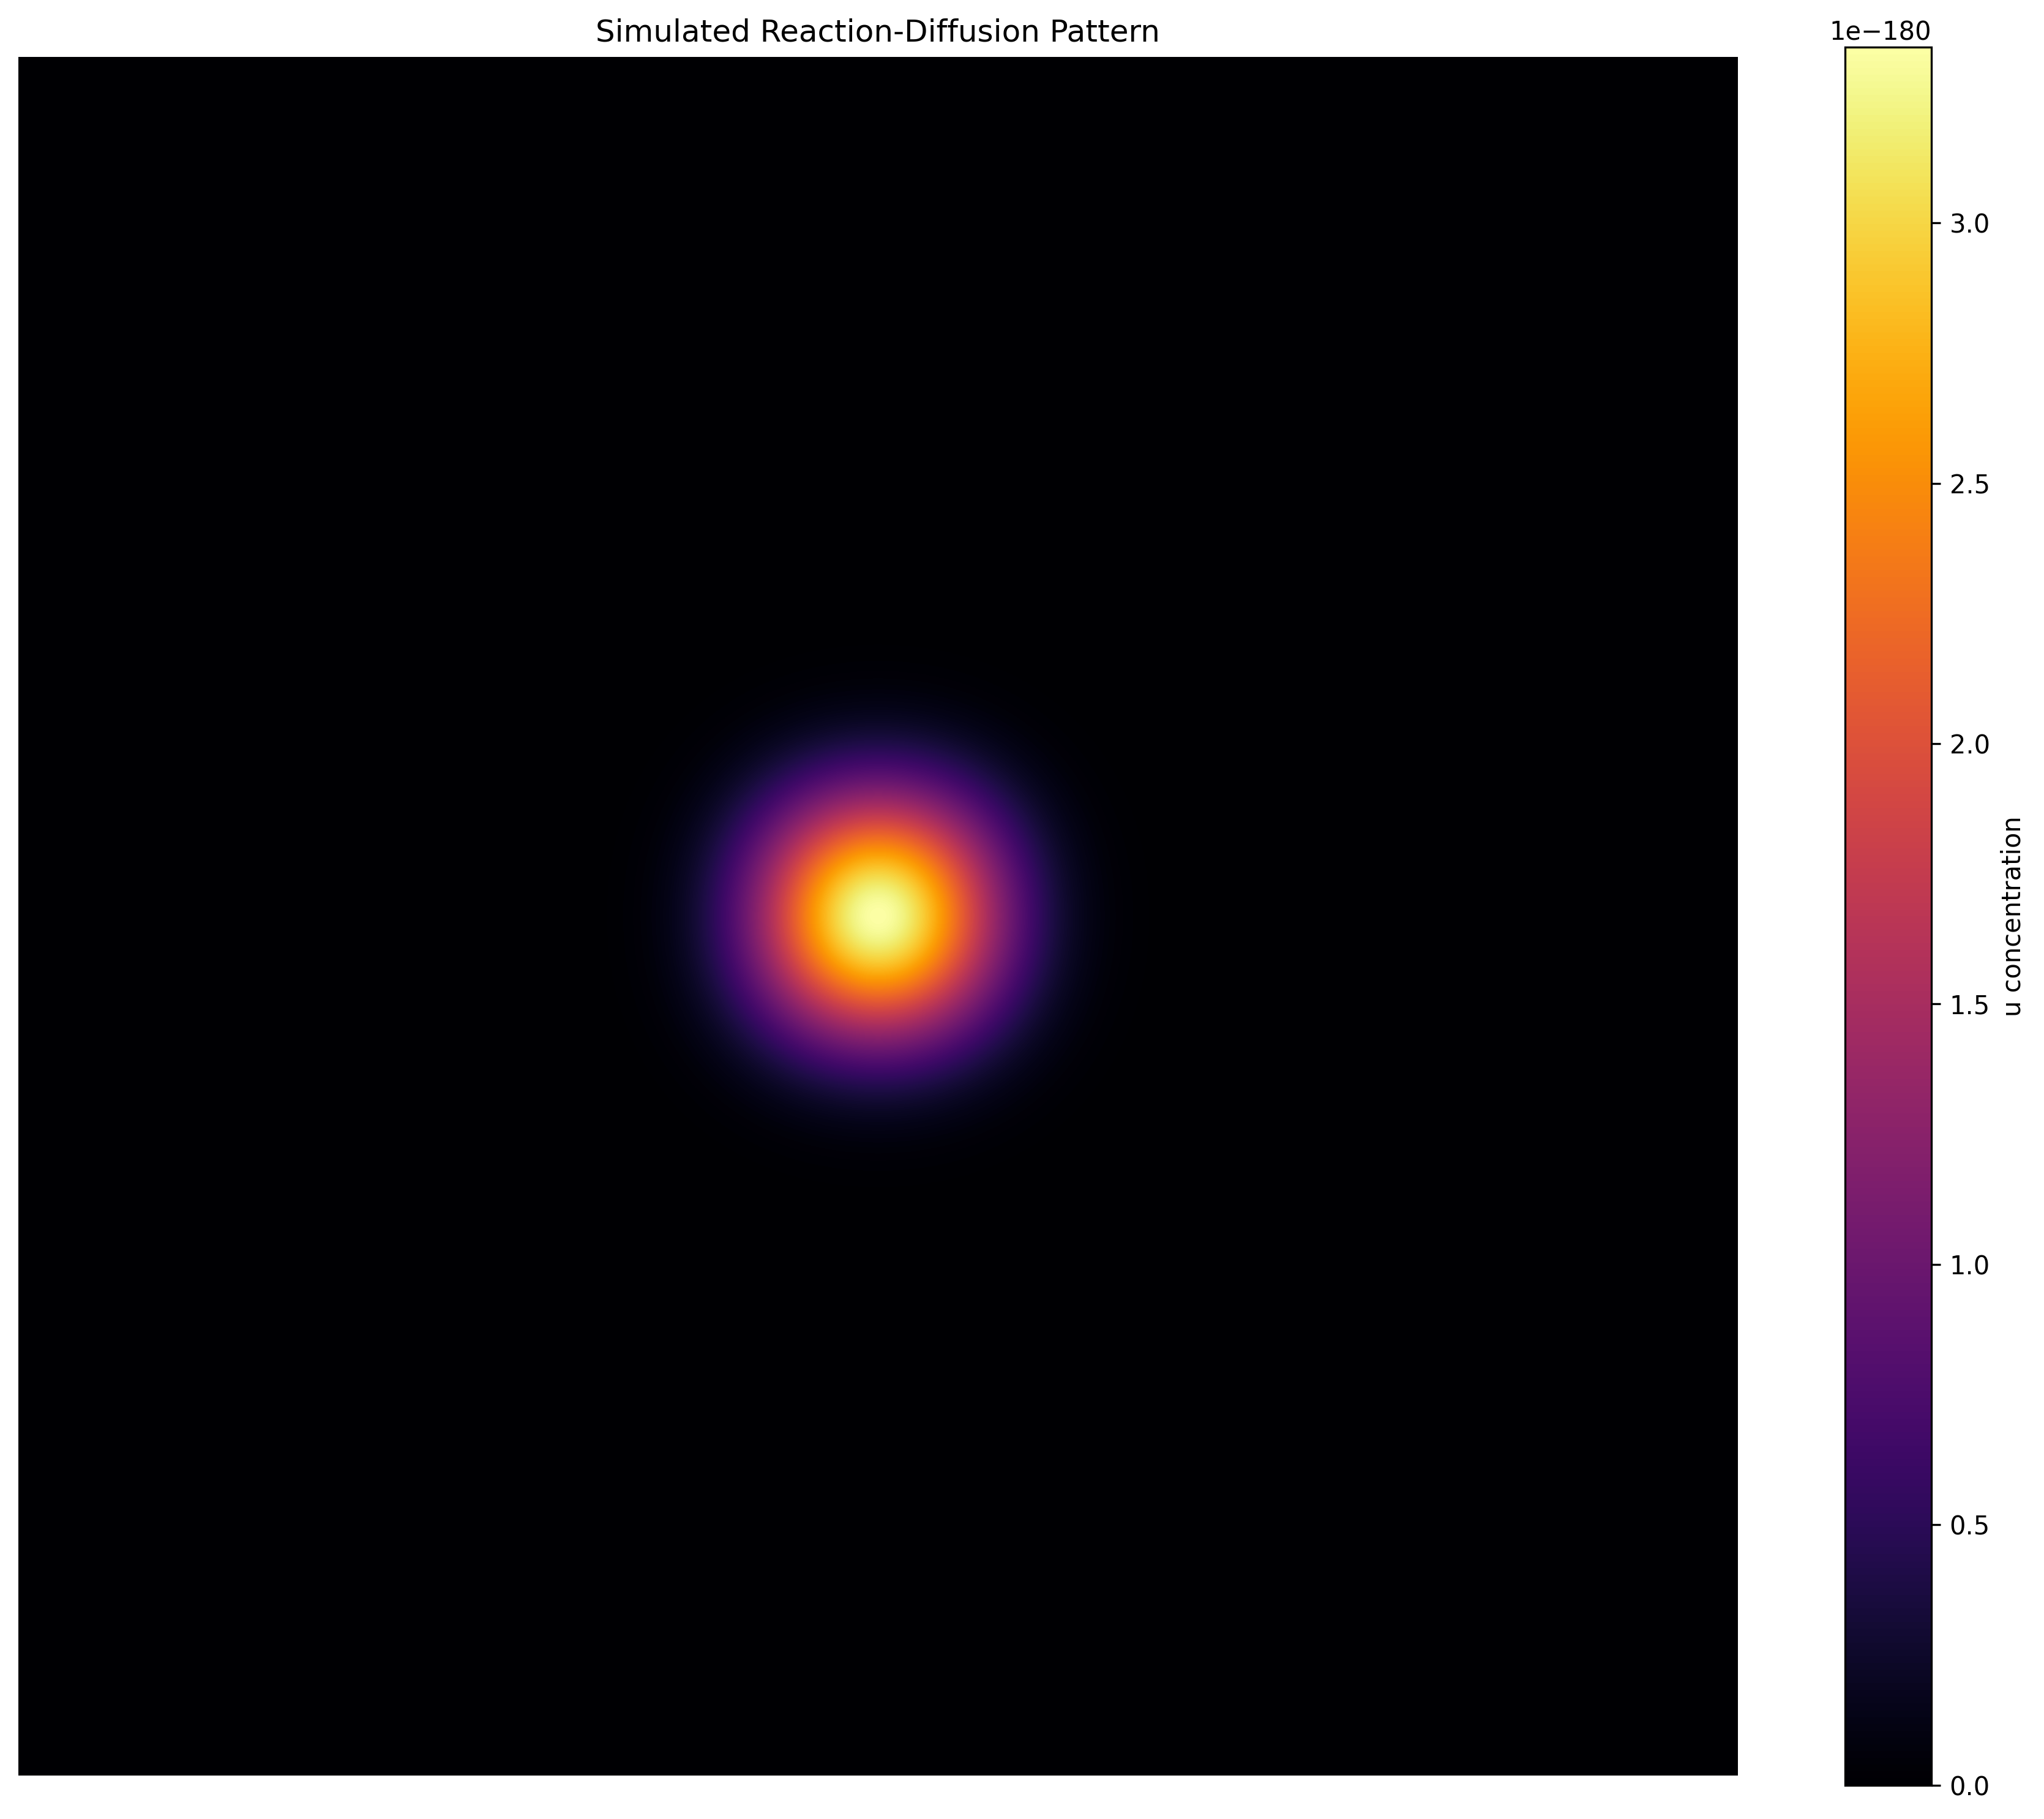

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter
# plot quality
plt.rcParams['figure.dpi'] = 300

# Parameters for the simulation
size = 512
n_steps = 4000
noise_scale = 0.001
diffusion = 0.1
reaction_rate = 0.04
k = 0.06 #rate of conversion of v to p
# Initialize two chemical fields (u, v) - reaction-diffusion style (Gray-Scott model)
u = np.ones((size, size))
v = np.zeros((size, size))

# Seed the initial perturbation
center = size // 2
r = 20
u[center-r:center+r, center-r:center+r] = 0.5
v[center-r:center+r, center-r:center+r] = 0.25

# Simulation loop (simple reaction-diffusion dynamics)
def simulate(u, v, steps):
    for _ in range(steps):
        lap_u = gaussian_filter(u, sigma=1) - u
        lap_v = gaussian_filter(v, sigma=1) - v

        uvv = u * v * v
        du = diffusion * lap_u - uvv + reaction_rate * (1 - u)
        dv = diffusion * lap_v + uvv - (reaction_rate + k) * v

        u += du
        v += dv
    return u, v

u_final, v_final = simulate(u.copy(), v.copy(), n_steps)

# Plots
plt.figure(figsize=(12, 10))
plt.imshow(v_final, cmap='inferno', interpolation='bilinear')
plt.title("Simulated Reaction-Diffusion Pattern")
plt.axis('off')
plt.colorbar(label='u concentration')
plt.tight_layout()
plt.show()
#finite square potential

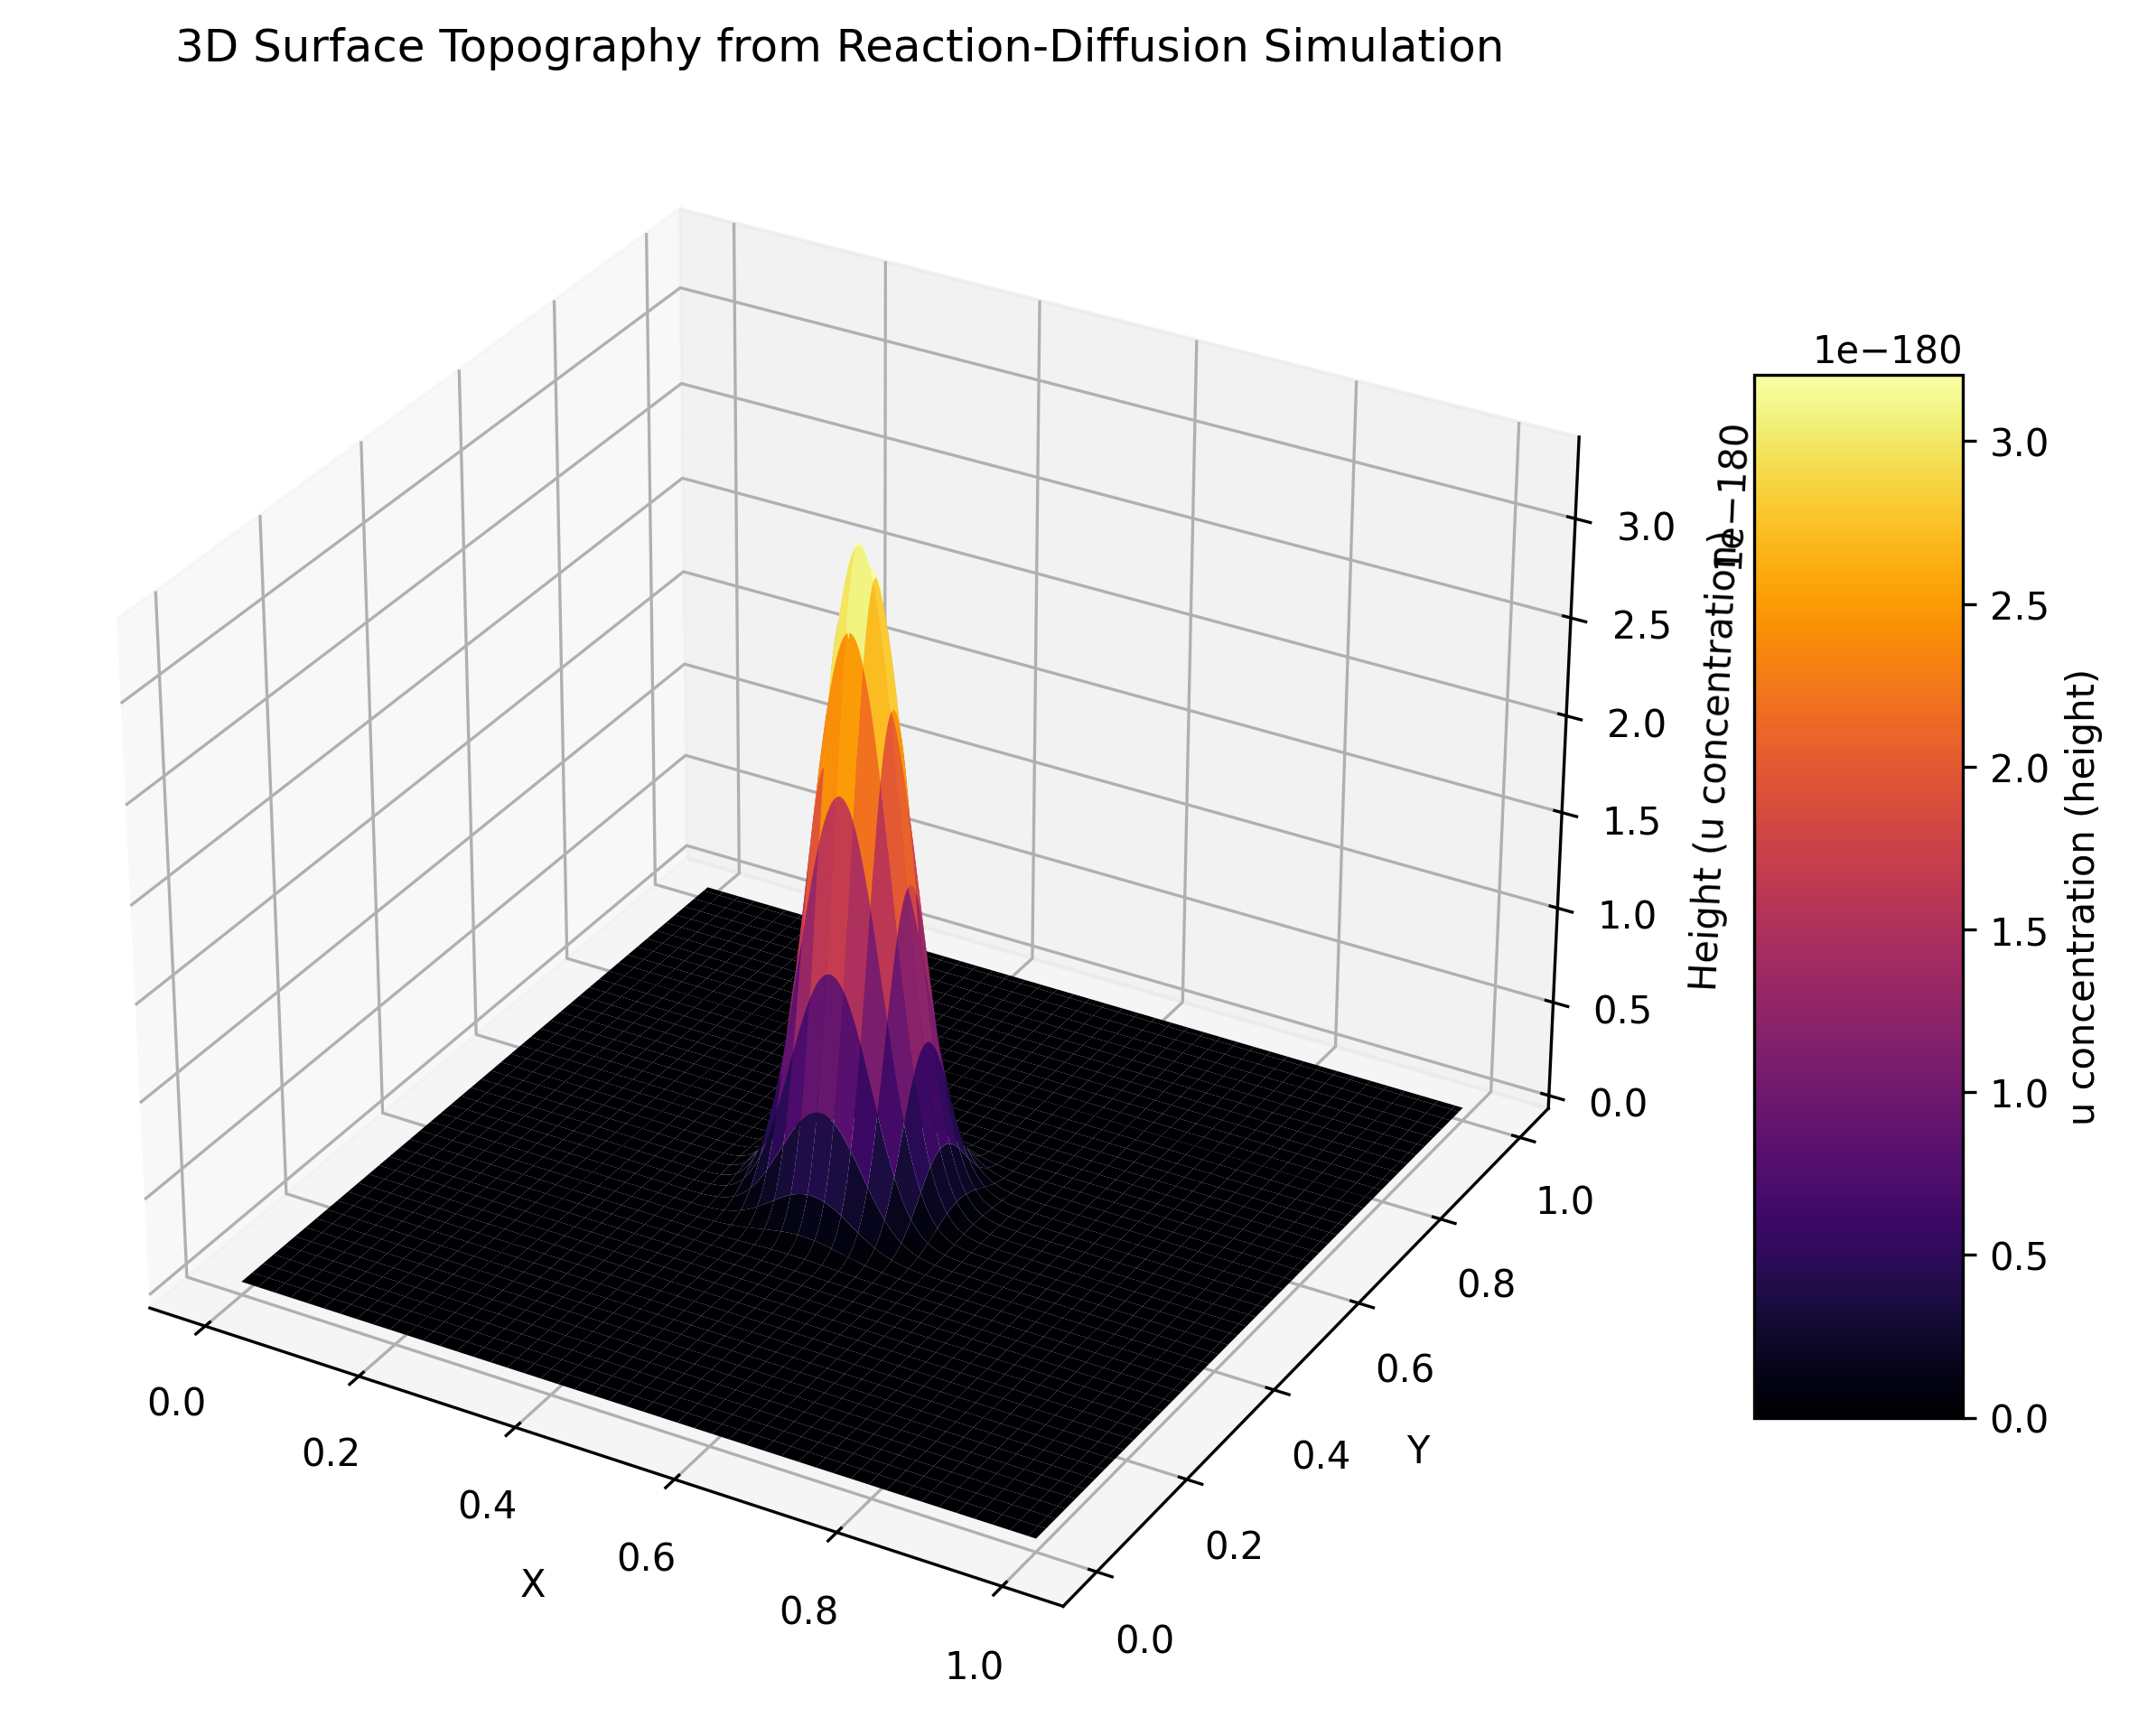

In [4]:
# Create a 3D plot of the final 'u' concentration as surface height
X, Y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
Z = v_final

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='inferno', edgecolor='none')

ax.set_title("3D Surface Topography from Reaction-Diffusion Simulation")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height (u concentration)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='u concentration (height)')

plt.tight_layout()
plt.show()


In [5]:
# Reinitialize with random noise to break symmetry
np.random.seed(42)  # For reproducibility

u_noise = 0.0 * np.ones((size, size))
v_noise = 1.0 * np.ones((size, size))

# Add small random perturbations to break symmetry
u_noise += 0.05 * np.random.rand(size, size)
v_noise += 0.05 * np.random.rand(size, size)

# Add a small central perturbation as before
r = 20
u_noise[center-r:center+r, center-r:center+r] = 0.25
v_noise[center-r:center+r, center-r:center+r] = 0.5

# Simulate the system with noise
u_final_noise, v_final_noise = simulate(u_noise.copy(), v_noise.copy(), n_steps)

# Create a 3D plot of the noisy 'u' concentration
X, Y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
Z_noise = v_final_noise

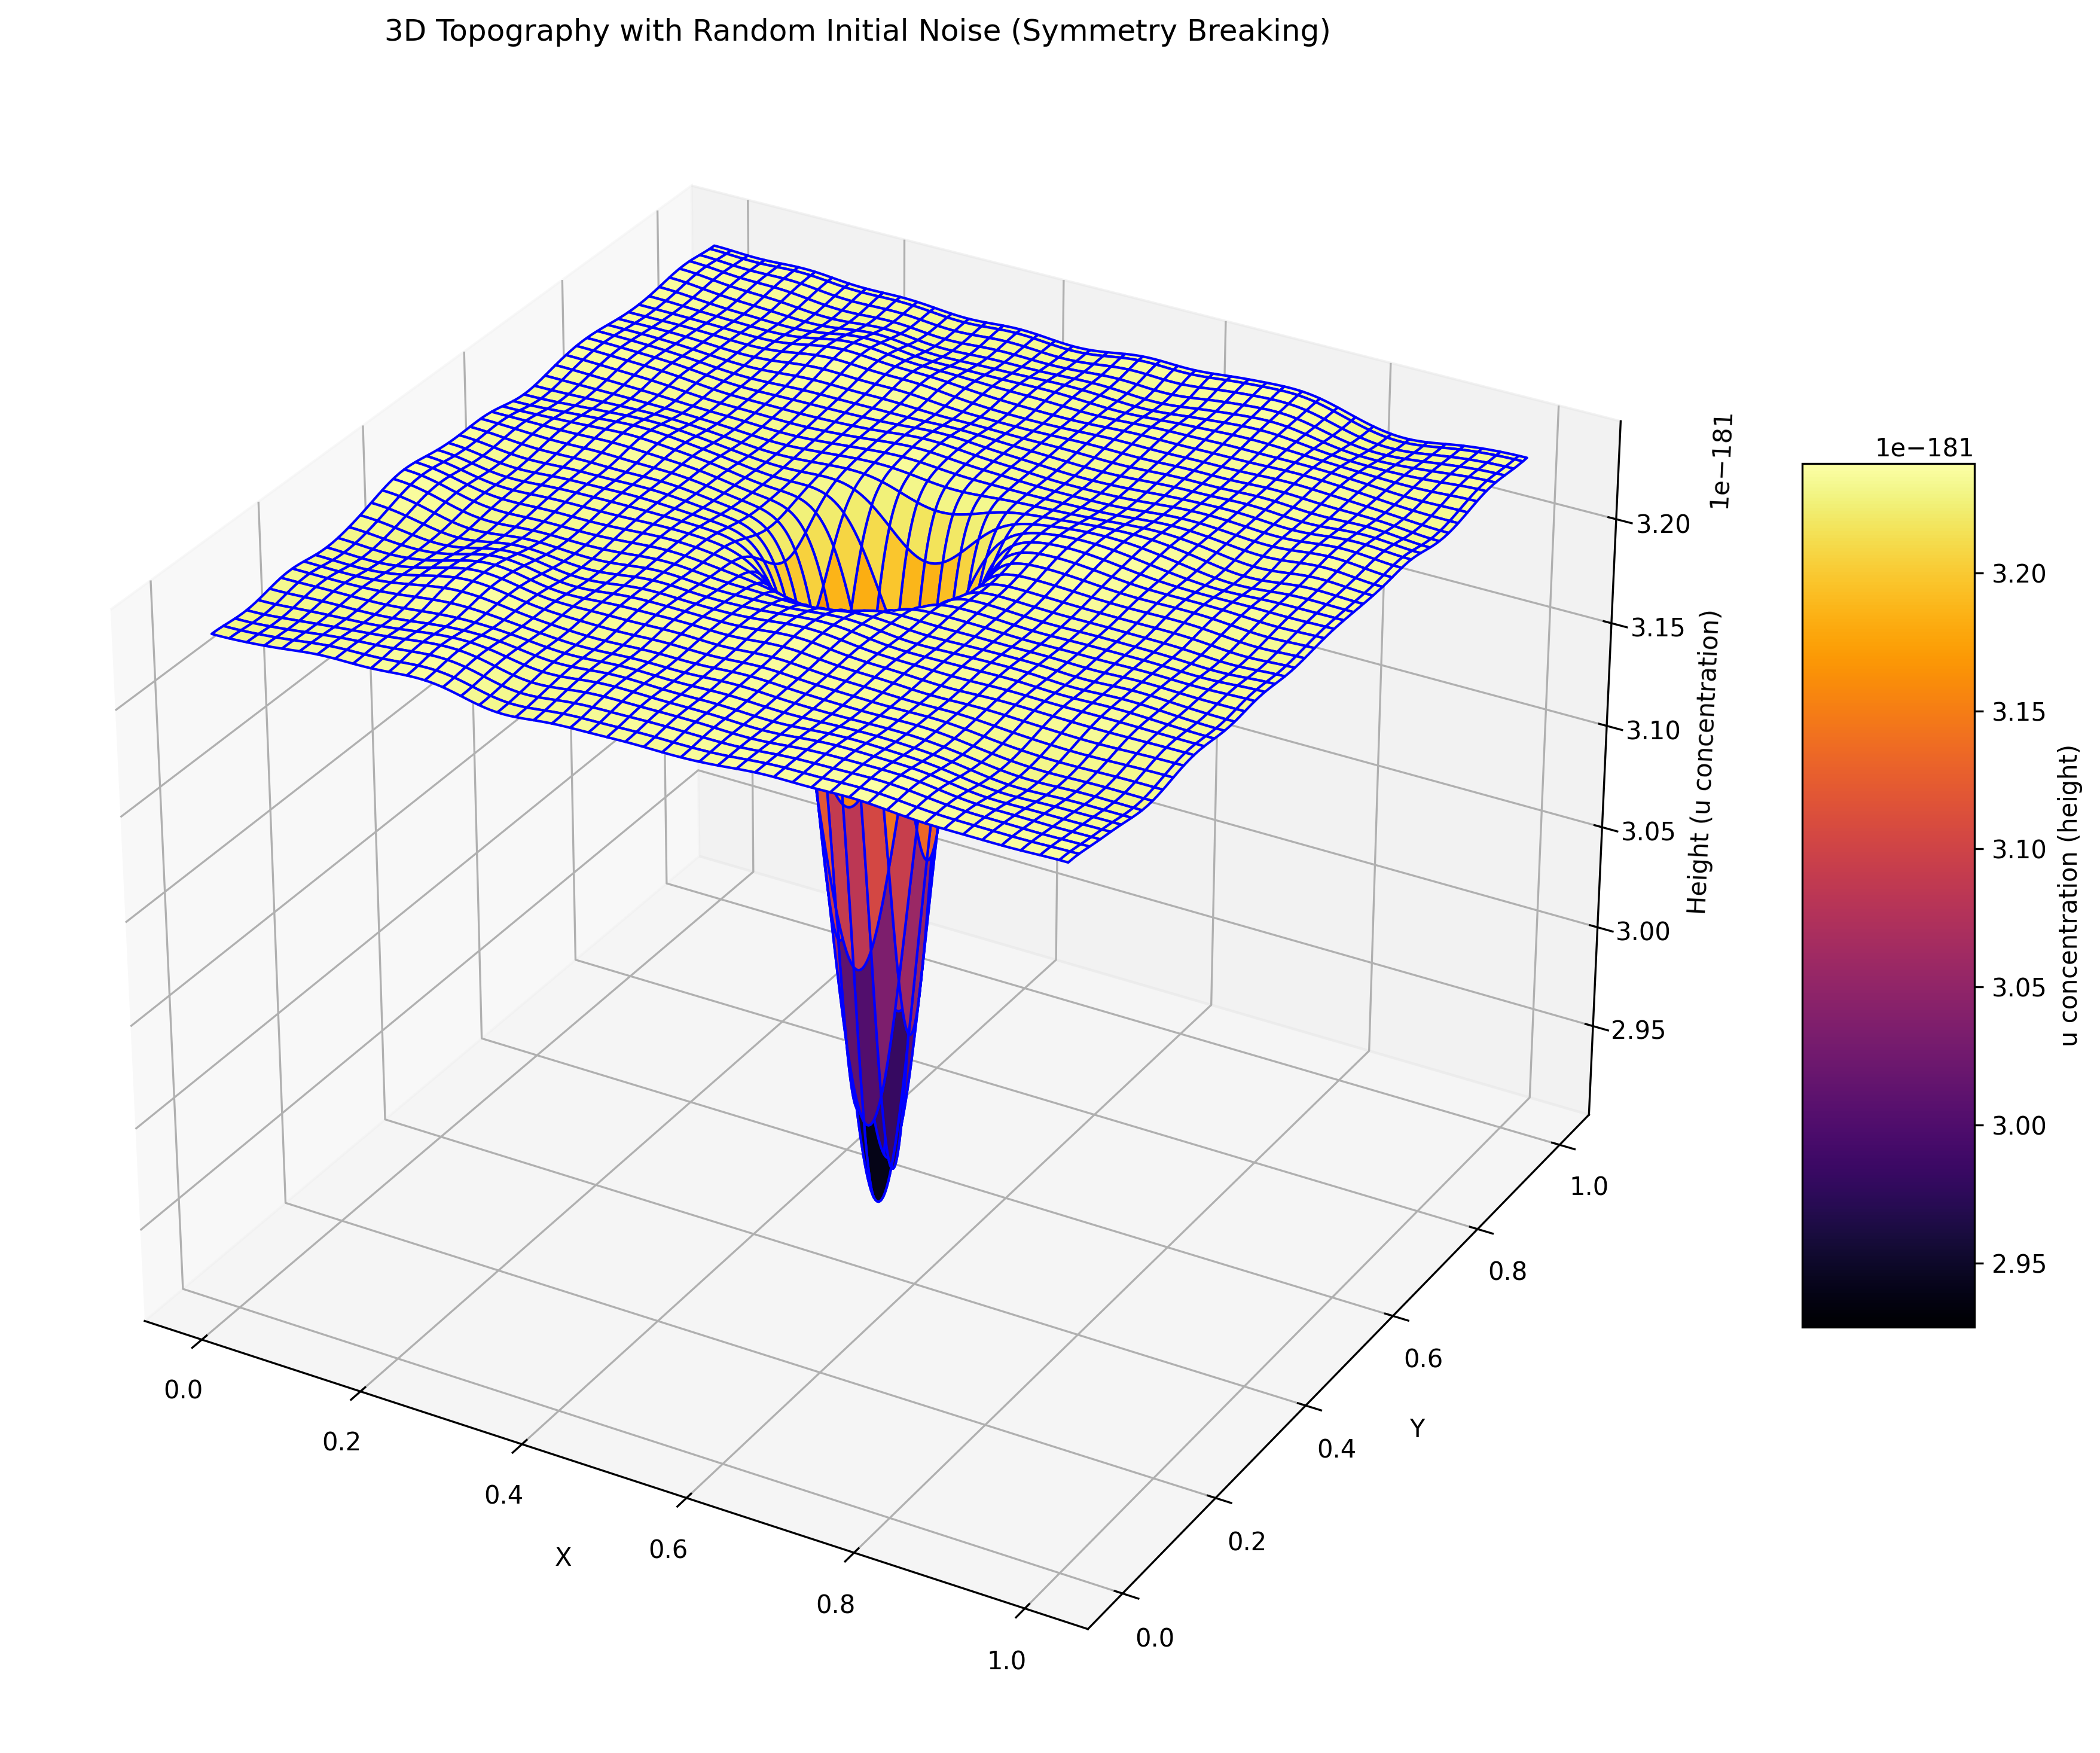

In [6]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_noise, cmap='inferno', edgecolor='blue')

ax.set_title("3D Topography with Random Initial Noise (Symmetry Breaking)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height (u concentration)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='u concentration (height)')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [7]:
# Adjusted parameters for stripe/spot formation
diffusion_stripe = 0.16
reaction_rate_stripe = 0.08

# Reinitialize with the same random noise
u_stripe = 0.0 * np.ones((size, size))
v_stripe = 1.0 * np.ones((size, size))
u_stripe += 0.05 * np.random.rand(size, size)
v_stripe += 0.05 * np.random.rand(size, size)

# Central perturbation to seed pattern
u_stripe[center-r:center+r, center-r:center+r] = 0.5
v_stripe[center-r:center+r, center-r:center+r] = 0.25

# Stripe pattern simulation loop
def simulate_stripe(u, v, steps, diff, rate):
    for _ in range(steps):
        lap_u = gaussian_filter(u, sigma=1) - u
        lap_v = gaussian_filter(v, sigma=1) - v

        uvv = u * v * v
        du = diffusion_stripe * lap_u - uvv + rate * (1 - u)
        dv = reaction_rate_stripe * lap_v + uvv - (rate + 0.05) * v

        u += du
        v += dv
    return u, v

u_stripe_final, v_stripe_final = simulate_stripe(u_stripe.copy(), v_stripe.copy(), n_steps, diffusion_stripe, reaction_rate_stripe)


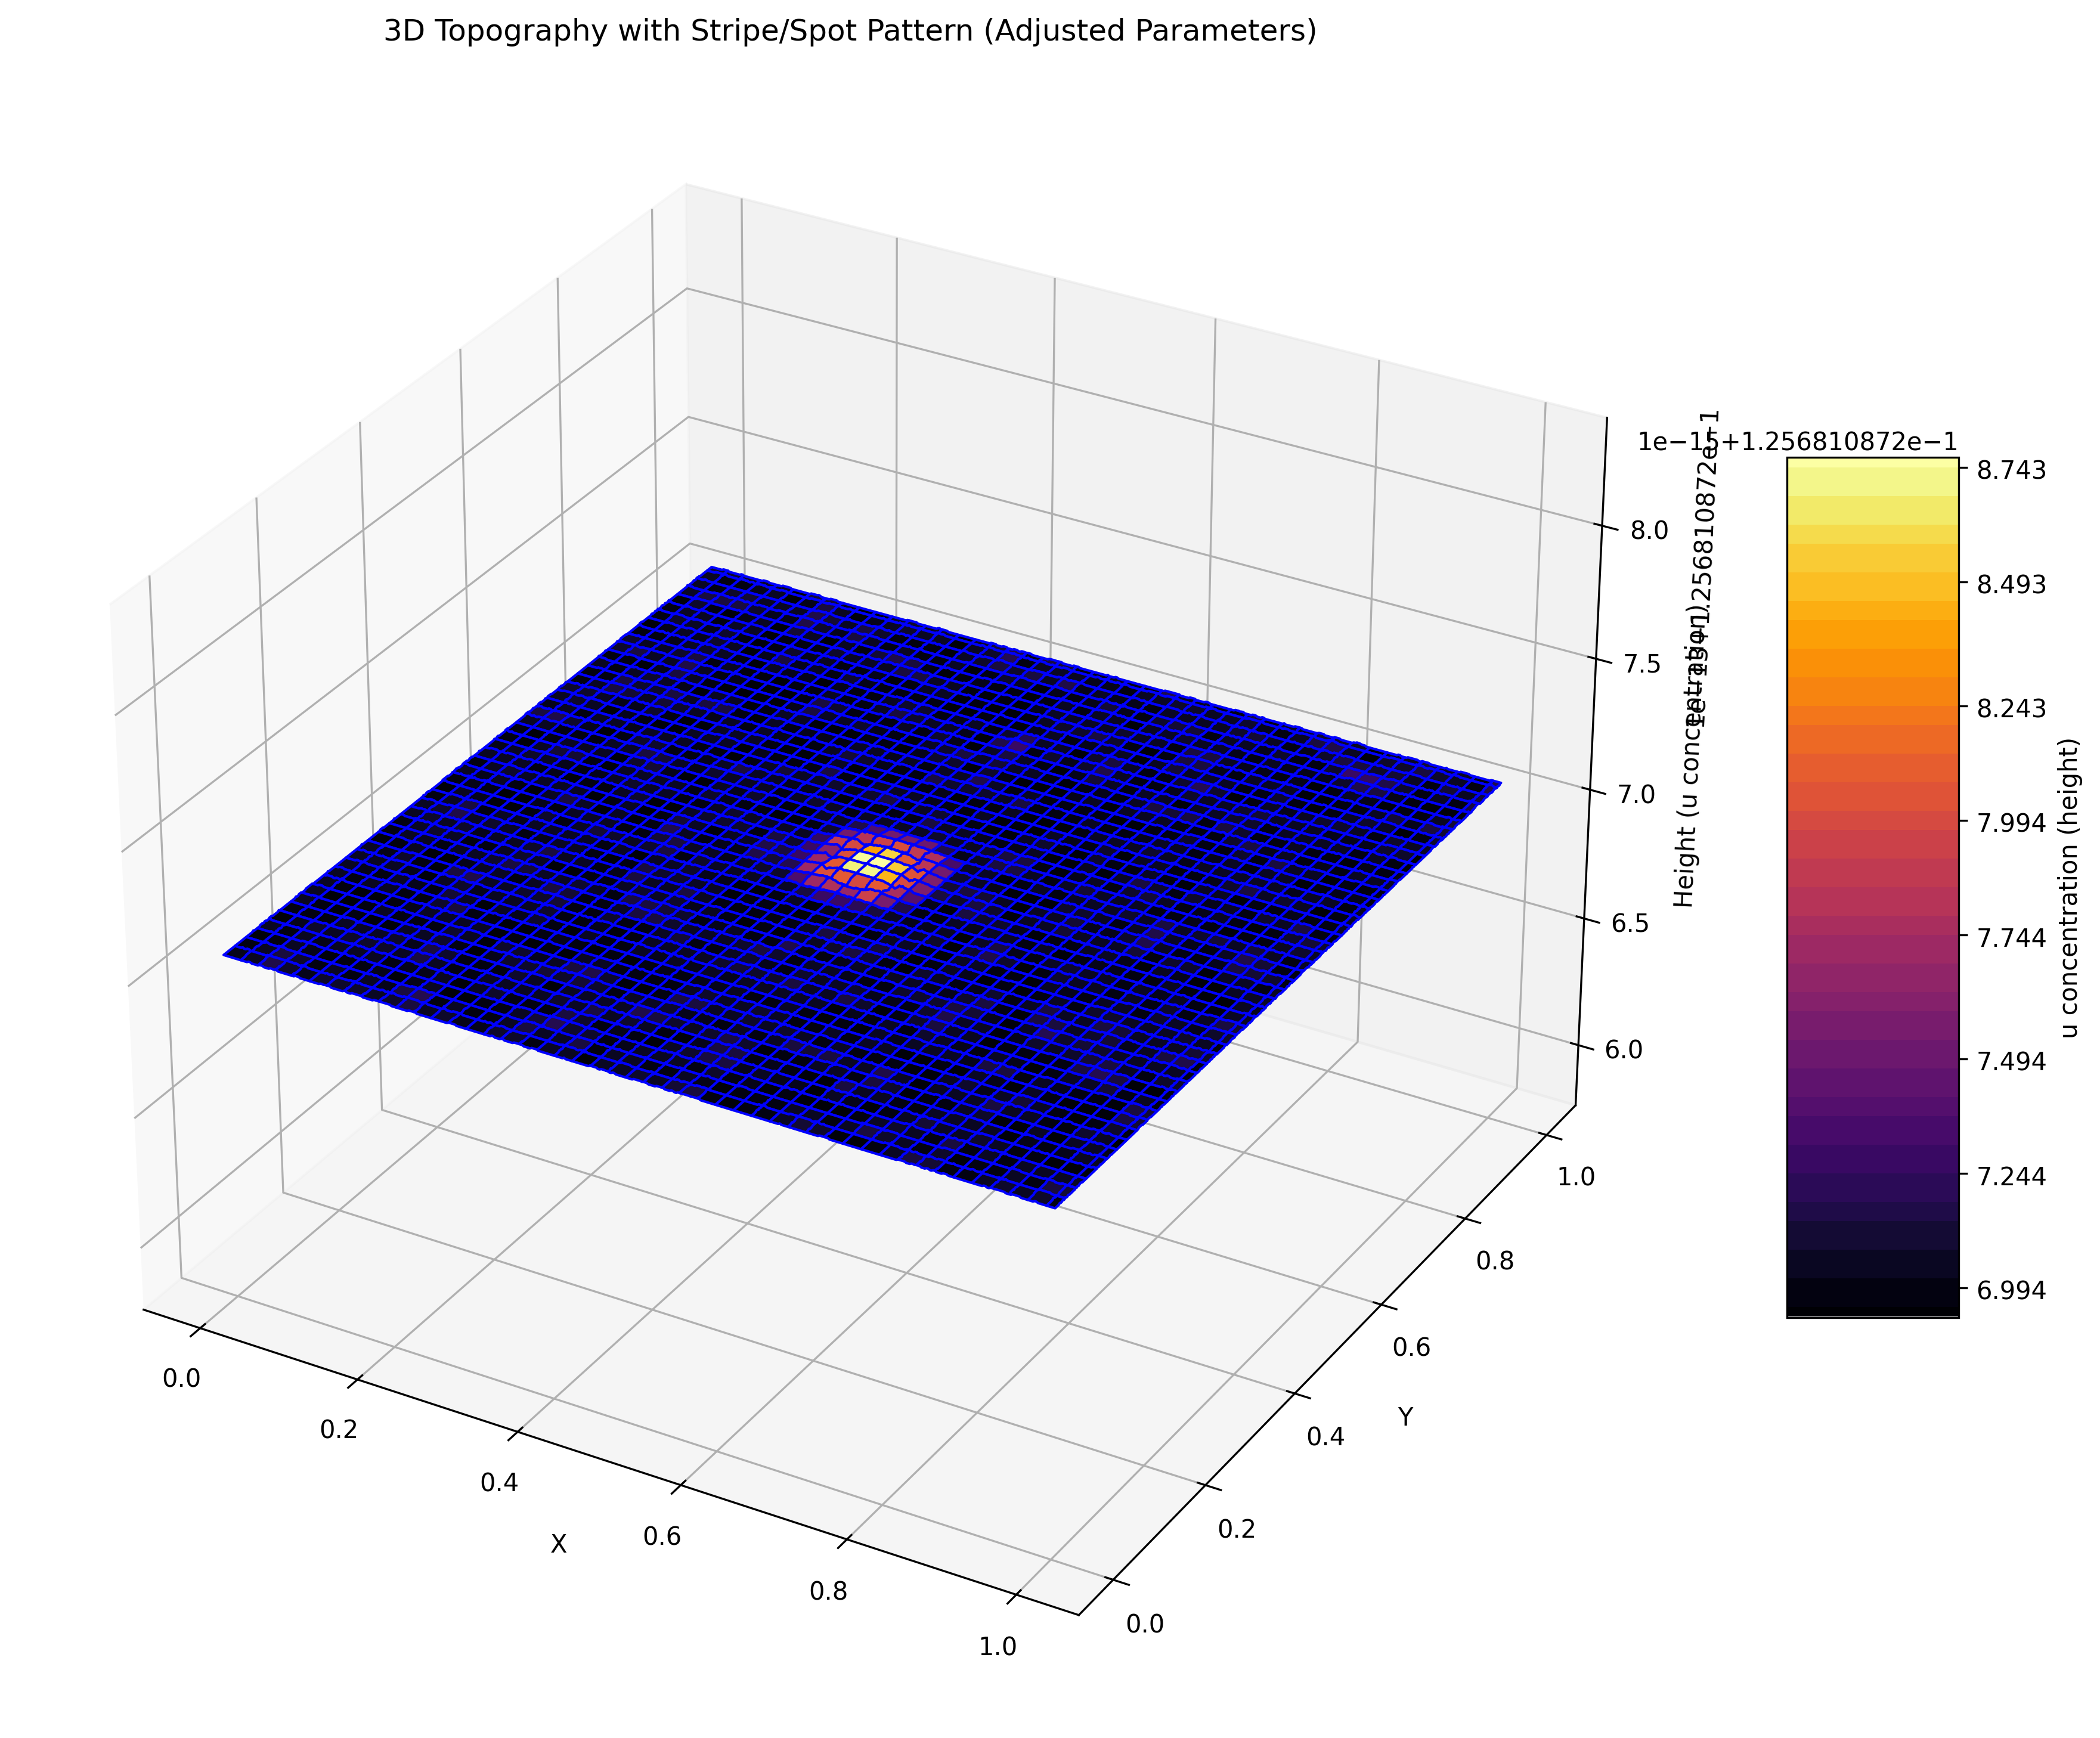

In [47]:

# Create a 3D plot
Z_stripe =  -u_stripe_final + v_stripe_final
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_stripe, cmap='inferno', edgecolor='blue')

ax.set_title("3D Topography with Stripe/Spot Pattern (Adjusted Parameters)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Height (u concentration)")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='u concentration (height)')

plt.tight_layout()
plt.show()
